In [4]:
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [5]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

### Data Loading

In [3]:
with open("../week-1/data/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [7]:
# Train sentences and labels
training_sentences = sentences[0:training_size]
training_labels = labels[0:training_size]

# Test sentences and labels
testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]

### Data Preprocessing

In [8]:
# Creates the tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
# Fits the tokenizer
tokenizer.fit_on_texts(training_sentences)

# Creates a word index
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, 
                                maxlen=max_length, 
                                padding=padding_type, 
                                truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, 
                               maxlen=max_length, 
                               padding=padding_type, 
                               truncating=trunc_type)

In [9]:
# Creates numpy arrays
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)

testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

### Model Architecture

In [10]:
# Defines the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 
                              embedding_dim, 
                              input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiles the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Number of epochs for training
num_epochs = 30

# Fits the model and captures the history
history = model.fit(training_padded, 
                    training_labels, 
                    epochs=num_epochs, 
                    validation_data=(testing_padded, 
                                     testing_labels), 
                    verbose=2)

Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the

### Model Evaluation

In [13]:
import matplotlib.pyplot as plt

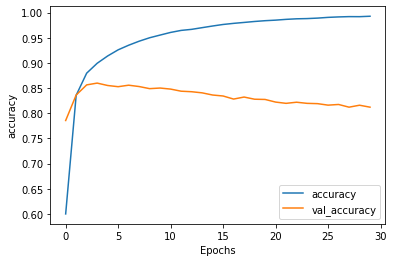

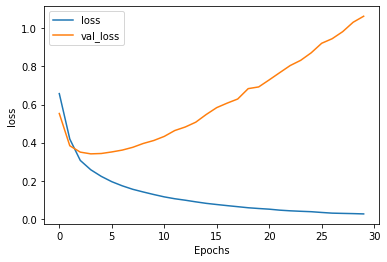

In [14]:
# Plot graphs function
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

# Calls the plot graphs function    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [15]:
# Generates a reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decode sentence function
def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [16]:
e = model.layers[0]
weights = e.get_weights()[0]
# Shape: (vocab_size, embedding_dim)
print(weights.shape) 

(10000, 16)


In [ ]:
import io

In [ ]:
# out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
# out_m = io.open('meta.tsv', 'w', encoding='utf-8')

# for word_num in range(1, vocab_size):
#     word = reverse_word_index[word_num]
#     embeddings = weights[word_num]
#     out_m.write(word + "\n")
#     out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")

# out_v.close()
# out_m.close()

In [18]:
sentence = [
    "granny starting to fear spiders in the garden might be real", 
    "game of thrones season finale showing this sunday night"]

sequences = tokenizer.texts_to_sequences(sentence)

padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(model.predict(padded))

[[9.5619166e-01]
 [3.2627931e-06]]
